In [1]:
!make -C .. tair_regr_maps tair_ucm_maps

make: Entering directory '/home/martibosch/data-science/invest-heat-islands'
make: Nothing to be done for 'tair_regr_maps'.
make: Nothing to be done for 'tair_ucm_maps'.
make: Leaving directory '/home/martibosch/data-science/invest-heat-islands'


In [2]:
import pandas as pd
import seaborn as sns
import xarray as xr
from matplotlib import colors

from invest_heat_islands import utils

In [3]:
station_locations_filepath = '../data/raw/stations/station-locations.csv'

tair_regr_maps_filepath = '../data/processed/tair-regr-maps.nc'
tair_ucm_maps_filepath = '../data/processed/tair-ucm-maps.nc'

In [4]:
T_regr_da = xr.open_dataarray(tair_regr_maps_filepath)
T_ucm_da = xr.open_dataarray(tair_ucm_maps_filepath)

station_location_df = pd.read_csv(station_locations_filepath, index_col=0)

In [5]:
palette = sns.color_palette('coolwarm')
cmap = colors.ListedColormap(palette)

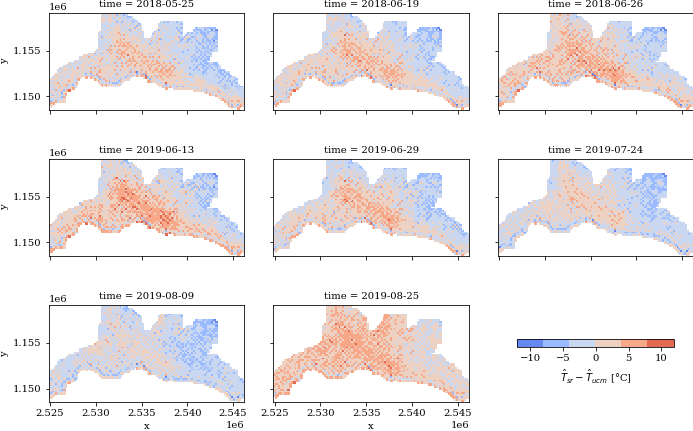

In [6]:
g = utils.plot_T_maps(T_regr_da - T_ucm_da, station_location_df, cmap=cmap)
g.fig.savefig('../reports/figures/comparison-maps.png')